In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline

iris = datasets.load_iris()


X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']



y


,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [48]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(X, clusters)

0.681046169211746

In [13]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Accuracy =  0.6666666666666666
Accuracy using GMM =  0.6666666666666666


Text(0, 0.5, 'Petal Width')

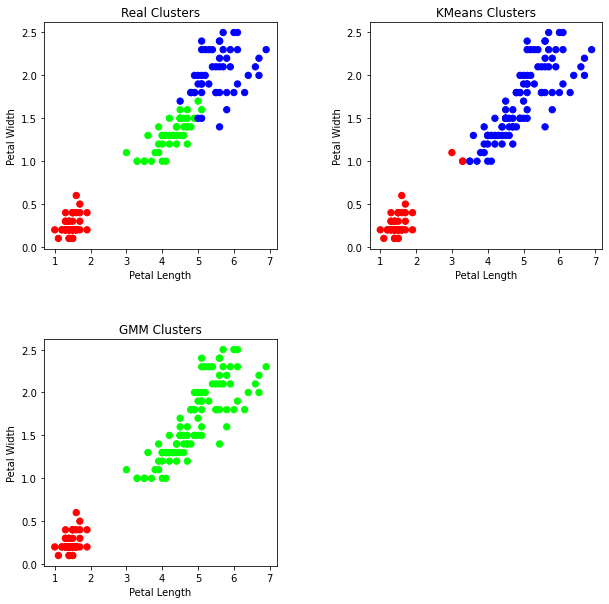

In [53]:
# Build the KMeans Model
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(2):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime','blue'])




# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')



# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')






# General EM for GMM
from sklearn import preprocessing




# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(2):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')